In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.simplefilter('ignore')

# Seminar 7 - Погружение в глубокое обучение
В семинаре, будем использовать набор данных `fashion_mnist`, загрузим их

In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train_cat), (x_test, y_test_cat) = fashion_mnist.load_data()
print('Training data shape: ', x_train.shape)
print('Test data shape: ', x_test.shape)

num_classes = 10
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 
               'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Using TensorFlow backend.


Training data shape:  (60000, 28, 28)
Test data shape:  (10000, 28, 28)


Сгенерируем случаные примеры для каждого класса и посмотрим на них.

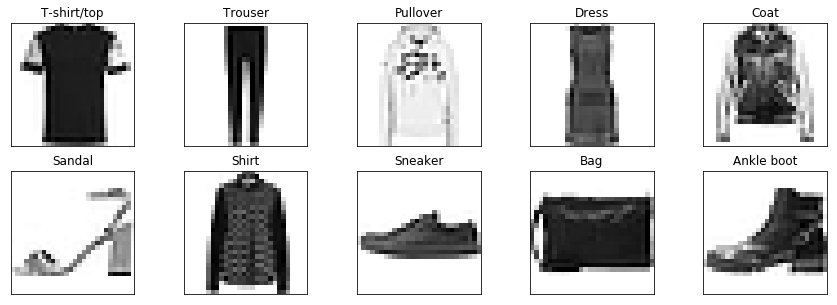

In [3]:
fig = plt.figure(figsize=(15,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train_cat[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im, cmap='gray_r')
plt.show()

##  Построим нашу первую нейросеть
Импорт `Keras`

In [4]:
from keras.models import Sequential # Модель, где все слои соединены друг с другом
from keras.layers import Dense, Flatten, Activation # Слой, где все нйероны предыдущего уровня соединены с нейронами следующего
from keras.utils import np_utils
from keras.optimizers import SGD,Adam,RMSprop

### Проведем небольшие предобработки

In [5]:
y_train = np_utils.to_categorical(y_train_cat, num_classes=num_classes)
y_test = np_utils.to_categorical(y_test_cat, num_classes=num_classes)

### Построим модель

In [6]:
input_shape = x_train.shape[1:]

In [7]:
# Создаем последовательную модель
model = Sequential()

# Добавляем слои
model.add(Flatten(input_shape=input_shape))
model.add(Dense(200))
model.add(Activation('sigmoid'))
model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Компилируем модель
optimizer = SGD(lr=0.1)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total para

#### Вопрос: 
Почему: $784 \times 200 = 156 800$, а сетка показывает число параметров: $157000$?

### Обучим модель, задав параметры

In [9]:
batch_size = 1000 # Выбираем размер Батча
epochs = 100

In [10]:
# Обучаем модель! 
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 0s 8us/step - loss: 1.6720 - acc: 0.6010 - val_loss: 1.2752 - val_acc: 0.7047
Epoch 2/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.0649 - acc: 0.7312 - val_loss: 0.9227 - val_acc: 0.7391
Epoch 3/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.8236 - acc: 0.7644 - val_loss: 0.7687 - val_acc: 0.7566
Epoch 4/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.7037 - acc: 0.7842 - val_loss: 0.6763 - val_acc: 0.7817
Epoch 5/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.6318 - acc: 0.7990 - val_loss: 0.6320 - val_acc: 0.7920
Epoch 6/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.5857 - acc: 0.8084 - val_loss: 0.5949 - val_acc: 0.8014
Epoch 7/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.5520 - acc: 0.8167 - val_loss: 0.5739 - val_acc

60000/60000 [==============================] - 0s 7us/step - loss: 0.4375 - acc: 0.8472 - val_loss: 0.4830 - val_acc: 0.8268
Epoch 61/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.4318 - acc: 0.8486 - val_loss: 0.4740 - val_acc: 0.8332
Epoch 62/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.4323 - acc: 0.8482 - val_loss: 0.4704 - val_acc: 0.8319
Epoch 63/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.4258 - acc: 0.8493 - val_loss: 0.4627 - val_acc: 0.8380
Epoch 64/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.4297 - acc: 0.8489 - val_loss: 0.4750 - val_acc: 0.8331
Epoch 65/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.4333 - acc: 0.8473 - val_loss: 0.4855 - val_acc: 0.8280
Epoch 66/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.4509 - acc: 0.8419 - val_loss: 0.4882 - val_acc: 0.8267
Epoch 67/100
60000/60000 [=====================

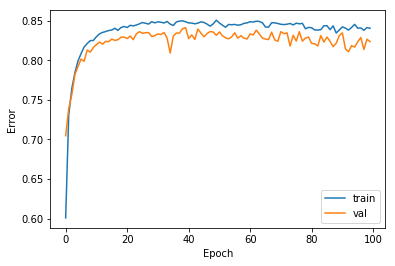

In [11]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

## Что мы можем улучшить? 
- Отнормировать признаки
- Заменить сигмоиды на ReLu
- Задать правила инициации весов

### Нормирование
<img src='normalize.png'>

In [12]:
x_train = (x_train/255)*2-1
x_test = (x_test/255)*2-1

### Функции активации
<img src='activations.png'>

### Инициациия весов
__Случайно__  
$ w = a * random$, но тогда если $a \gg 1$, то на выходе $b\gg1$ и если $a \ll 1 $, то $b \approx 0 $  

__Xavier__  
$a = \frac{1}{\sqrt{n}}$, где $n$ - кол-во нейронов на входе

__He__  
$a = \frac{1}{\sqrt{\frac{n}{2}}}$, где $n$ - кол-во нейронов на входе

In [13]:
from keras.initializers import he_normal

In [14]:
def create_model(input_shape, optimizer):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(200, kernel_initializer=he_normal()))
    model.add(Activation('relu'))
    model.add(Dense(100, kernel_initializer=he_normal()))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
optimizer = SGD(lr=0.1)
model = create_model(input_shape, optimizer)

In [16]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.8873 - acc: 0.6821 - val_loss: 0.5932 - val_acc: 0.7864
Epoch 2/100
60000/60000 [==============================] - 1s 8us/step - loss: 0.5620 - acc: 0.7941 - val_loss: 0.5499 - val_acc: 0.7955
Epoch 3/100
60000/60000 [==============================] - 0s 8us/step - loss: 0.4884 - acc: 0.8225 - val_loss: 0.5221 - val_acc: 0.8069
Epoch 4/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.4624 - acc: 0.8318 - val_loss: 0.5068 - val_acc: 0.8168
Epoch 5/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.4346 - acc: 0.8418 - val_loss: 0.4630 - val_acc: 0.8322
Epoch 6/100
60000/60000 [==============================] - 1s 8us/step - loss: 0.4134 - acc: 0.8487 - val_loss: 0.4354 - val_acc: 0.8409
Epoch 7/100
60000/60000 [==============================] - 0s 8us/step - loss: 0.3944 - acc: 0.8566 - val_loss: 0.4152 - val_ac

60000/60000 [==============================] - 1s 9us/step - loss: 0.2062 - acc: 0.9253 - val_loss: 0.3246 - val_acc: 0.8847
Epoch 61/100
60000/60000 [==============================] - 1s 8us/step - loss: 0.2062 - acc: 0.9248 - val_loss: 0.3169 - val_acc: 0.8871
Epoch 62/100
60000/60000 [==============================] - 1s 8us/step - loss: 0.2019 - acc: 0.9276 - val_loss: 0.3177 - val_acc: 0.8860
Epoch 63/100
60000/60000 [==============================] - 0s 8us/step - loss: 0.2025 - acc: 0.9266 - val_loss: 0.3248 - val_acc: 0.8848
Epoch 64/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.2038 - acc: 0.9251 - val_loss: 0.3259 - val_acc: 0.8843
Epoch 65/100
60000/60000 [==============================] - 1s 8us/step - loss: 0.1981 - acc: 0.9288 - val_loss: 0.3653 - val_acc: 0.8673
Epoch 66/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.1991 - acc: 0.9273 - val_loss: 0.3309 - val_acc: 0.8852
Epoch 67/100
60000/60000 [=====================

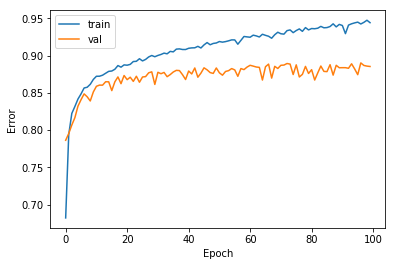

In [17]:
def viz_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='val')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

viz_history(history)

## Влияние скорости обучения
Посмотрим, как влияет параметр `learning_rate` на качество нашей модели на обучающей выборке

100%|██████████| 4/4 [03:14<00:00, 48.53s/it]


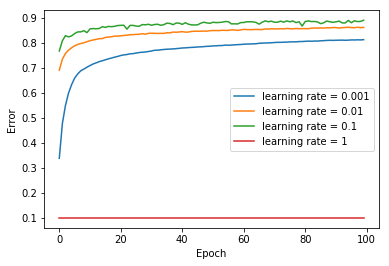

In [27]:
for i in tqdm([0.001, 0.01, 0.1, 1]):
    optimizer = SGD(lr=i)
    model = create_model(input_shape, optimizer)
    history = model.fit(x_train, y_train, verbose=0,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
    plt.plot(history.history['val_acc'], label='learning rate = {}'.format(i))
    
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

## Влияние метода оптимизации градиентного спуска

<img src='optimizers7.gif'>

#### Momentum
Вместо того, чтобы использовать только градиент текущего шага, мы будем накапливать импульс градиента прошлых шагов для определения направления движения. 
В связи со стохастической природой, обновления градиента происходят "зигзагообразно", с помощью момента мы усиливаем движение вдоль основного направления. На практике коэффициент у момента инициализируется на уровне 0,5 и постепенно увеличивается до 0,9 в течение нескольких эпох. 
  
#### RMSProp (Root Mean Square Propogation)   


#### Adam (Adaptive moment estimation)
Cочетает в себе и идею накопления движения и идею более слабого обновления весов для типичных признаков

100%|██████████| 3/3 [02:33<00:00, 51.05s/it]


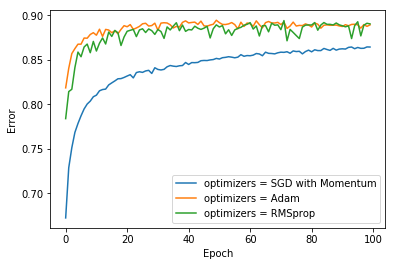

In [19]:
names = ['SGD with Momentum', 'Adam', 'RMSprop']
optimizers = {'SGD with Momentum': SGD(nesterov=True), 
              'Adam': Adam(),
              'RMSprop': RMSprop()
             }

for opt in tqdm(names):
    model = create_model(input_shape, optimizers[opt])
    history = model.fit(x_train, y_train, verbose=0,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
    plt.plot(history.history['val_acc'], label='optimizers = {}'.format(opt))
    
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

## Применим, все полученные знания

In [20]:
optimizer = Adam()
model = create_model(input_shape, optimizer)

history = model.fit(x_train, y_train, verbose=1,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.7656 - acc: 0.7332 - val_loss: 0.5074 - val_acc: 0.8160
Epoch 2/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.4450 - acc: 0.8397 - val_loss: 0.4484 - val_acc: 0.8388
Epoch 3/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.3940 - acc: 0.8581 - val_loss: 0.4059 - val_acc: 0.8546
Epoch 4/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.3575 - acc: 0.8716 - val_loss: 0.3937 - val_acc: 0.8575
Epoch 5/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.3372 - acc: 0.8789 - val_loss: 0.3778 - val_acc: 0.8664
Epoch 6/100
60000/60000 [==============================] - 1s 8us/step - loss: 0.3170 - acc: 0.8852 - val_loss: 0.3607 - val_acc: 0.8713
Epoch 7/100
60000/60000 [==============================] - 0s 8us/step - loss: 0.3032 - acc: 0.8904 - val_loss: 0.3681 - val_ac

60000/60000 [==============================] - 1s 9us/step - loss: 0.0514 - acc: 0.9831 - val_loss: 0.4656 - val_acc: 0.8903
Epoch 61/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.0491 - acc: 0.9843 - val_loss: 0.4619 - val_acc: 0.8885
Epoch 62/100
60000/60000 [==============================] - 0s 8us/step - loss: 0.0519 - acc: 0.9831 - val_loss: 0.4708 - val_acc: 0.8890
Epoch 63/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.0495 - acc: 0.9833 - val_loss: 0.4882 - val_acc: 0.8888
Epoch 64/100
60000/60000 [==============================] - 1s 8us/step - loss: 0.0475 - acc: 0.9848 - val_loss: 0.4776 - val_acc: 0.8920
Epoch 65/100
60000/60000 [==============================] - 1s 8us/step - loss: 0.0474 - acc: 0.9845 - val_loss: 0.4817 - val_acc: 0.8918
Epoch 66/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.0423 - acc: 0.9872 - val_loss: 0.4762 - val_acc: 0.8920
Epoch 67/100
60000/60000 [===================

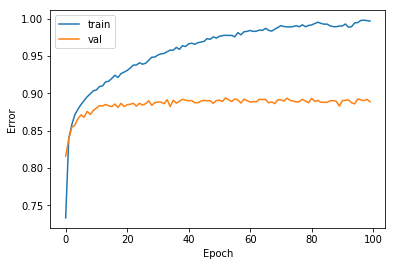

In [21]:
viz_history(history)

## Объявляем, борьбу с переобучением

In [22]:
from keras.layers import Dropout, BatchNormalization

In [23]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(200, kernel_initializer=he_normal()))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100, kernel_initializer=he_normal()))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, verbose=1,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 16us/step - loss: 1.0019 - acc: 0.6532 - val_loss: 0.5676 - val_acc: 0.7972
Epoch 2/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.6240 - acc: 0.7790 - val_loss: 0.4958 - val_acc: 0.8198
Epoch 3/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.5620 - acc: 0.8023 - val_loss: 0.4642 - val_acc: 0.8317
Epoch 4/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.5310 - acc: 0.8144 - val_loss: 0.4434 - val_acc: 0.8331
Epoch 5/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.5051 - acc: 0.8229 - val_loss: 0.4298 - val_acc: 0.8441
Epoch 6/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.4888 - acc: 0.8296 - val_loss: 0.4233 - val_acc: 0.8455
Epoch 7/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.4724 - acc: 0.8338 - val_loss: 0.4133 - v

60000/60000 [==============================] - 1s 10us/step - loss: 0.3203 - acc: 0.8843 - val_loss: 0.3384 - val_acc: 0.8818
Epoch 60/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.3201 - acc: 0.8822 - val_loss: 0.3425 - val_acc: 0.8787
Epoch 61/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.3214 - acc: 0.8835 - val_loss: 0.3416 - val_acc: 0.8800
Epoch 62/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.3183 - acc: 0.8842 - val_loss: 0.3445 - val_acc: 0.8776
Epoch 63/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.3165 - acc: 0.8843 - val_loss: 0.3427 - val_acc: 0.8786
Epoch 64/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.3202 - acc: 0.8822 - val_loss: 0.3429 - val_acc: 0.8765
Epoch 65/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.3156 - acc: 0.8852 - val_loss: 0.3477 - val_acc: 0.8791
Epoch 66/100
60000/60000 [==============

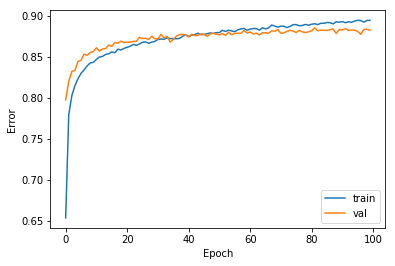

In [25]:
viz_history(history)

# Теперь твоя очередь! 

Побей бейзлайн 2 в соревновании [Птица или самолет](https://www.kaggle.com/c/bird-or-aircraft/leaderboard)

# Ссылки
- [Курс "Deep learning на пальцах", лекция 4](https://youtu.be/tnrbx7V9RbA)
- [Статья: Оптимизация градиентного спуска](http://ruder.io/optimizing-gradient-descent/)
- [Статья: Методы оптимизации нейронных сетей](https://habr.com/ru/post/318970/)